In [44]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.CodeMirror {font-family:Consolas; font-size:13pt;}
div.output {font-size:13pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:13pt;}
</style>
"""))

# 1번. 패키지 로드 & 한글설정 & 경고메세지 ignore

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 한글 설정
plt.rc('font', family = 'Malgun Gothic')
# plt.rc('font', family = 'AppleGothic')
plt.rc('axes', unicode_minus = False)

# 경고메세지 - 시각화 필수
import warnings
warnings.filterwarnings(action = 'ignore')

# 2번.

## 2.1 df_first 변수에 데이터(2013년9월부터 2015년8월까지 데이터) 담기

In [3]:
df_first = pd.read_csv('D:/Gray_Bigdata/Downloads/sharedData/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv', 
                       encoding='CP949')

df_first.sample().T

,11
지역,충남
2013년12월,6365
2014년1월,6365
2014년2월,6379
2014년3월,6287
2014년4월,6552
2014년5월,6591
2014년6월,6644
2014년7월,6805
2014년8월,6914


## 2.2 df_last 변수에 데이터 담기

In [4]:
df_last = pd.read_csv('D:/Gray_Bigdata/Downloads/sharedData/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210531.csv', 
                      encoding='CP949')

df_last.sample().T

,902
지역명,충북
규모구분,전용면적 60㎡초과 85㎡이하
연도,2016
월,8
분양가격(㎡),2149


# 3번. df_last의 결측치 확인 및 대체 여부

In [5]:
df_last.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    449
dtype: int64

In [6]:
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    449
dtype: int64

# 4번. df_last 데이터셋에 평당분양가격 컬럼을 추가하고 수정하기

In [7]:
# 분양가격(㎡)컬럼에 콤마가 있는 행(파이썬은 & 연산자의 우선순위가 낮아 괄호 필요)
df_last[df_last['분양가격(㎡)'].notnull() & (df_last['분양가격(㎡)'].str.find(",")!=-1)]

,지역명,규모구분,연도,월,분양가격(㎡)
2125,서울,모든면적,2017,11,"6,657"
2126,서울,전용면적 60㎡이하,2017,11,"6,931"
2127,서울,전용면적 60㎡초과 85㎡이하,2017,11,"5,899"
2128,서울,전용면적 85㎡초과 102㎡이하,2017,11,"7,311"
2129,서울,전용면적 102㎡초과,2017,11,"6,880"
...,...,...,...,...,...
2203,경남,전용면적 85㎡초과 102㎡이하,2017,11,"2,914"
2204,경남,전용면적 102㎡초과,2017,11,"2,838"
2205,제주,모든면적,2017,11,"3,560"
2206,제주,전용면적 60㎡이하,2017,11,"5,380"


In [8]:
df_last['분양가격(㎡)'] = df_last['분양가격(㎡)'].str.replace(",", "")

df_last.head(2190)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
2185,전북,모든면적,2017,11,2200
2186,전북,전용면적 60㎡이하,2017,11,2259
2187,전북,전용면적 60㎡초과 85㎡이하,2017,11,2192
2188,전북,전용면적 85㎡초과 102㎡이하,2017,11,NaN


In [9]:
df_last['분양가격(㎡)'].describe()

count     5331
unique    2126
top       3395
freq        18
Name: 분양가격(㎡), dtype: object

In [10]:
df_last['분양가격(㎡)'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')

In [11]:
df_last['평당분양가격'] = df_last['분양가격(㎡)'] * 3.3

df_last.head(2190)

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7
...,...,...,...,...,...,...
2185,전북,모든면적,2017,11,2200.0,7260.0
2186,전북,전용면적 60㎡이하,2017,11,2259.0,7454.7
2187,전북,전용면적 60㎡초과 85㎡이하,2017,11,2192.0,7233.6
2188,전북,전용면적 85㎡초과 102㎡이하,2017,11,NaN,NaN


# 5번. df_last 데이터셋에서 전용면적 컬럼을 추가하기

In [12]:
df_last['전용면적'] = df_last['규모구분'].apply(lambda x : x.replace("전용면적", ""))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x : x.replace("초과", "~"))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x : x.replace("이하", ""))
df_last['전용면적'] = df_last['전용면적'].apply(lambda x : x.replace(" ", "").strip())

df_last.head(2180)

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격,전용면적
0,서울,모든면적,2015,10,5841.0,19275.3,모든면적
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6,60㎡
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...,...
2175,충북,모든면적,2017,11,2077.0,6854.1,모든면적
2176,충북,전용면적 60㎡이하,2017,11,2203.0,7269.9,60㎡
2177,충북,전용면적 60㎡초과 85㎡이하,2017,11,2076.0,6850.8,60㎡~85㎡
2178,충북,전용면적 85㎡초과 102㎡이하,2017,11,2271.0,7494.3,85㎡~102㎡


# 6번. 컬럼(규모구분과 분양가격((㎡)컬럼)의 제거 전/후 메모리 사용량 파악

In [13]:
# 제거 전 메모리 사용량 : 316.2+ KB
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5780 non-null   object 
 1   규모구분     5780 non-null   object 
 2   연도       5780 non-null   int64  
 3   월        5780 non-null   int64  
 4   분양가격(㎡)  5315 non-null   float64
 5   평당분양가격   5315 non-null   float64
 6   전용면적     5780 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 316.2+ KB


In [14]:
# 컬럼 제거
df_last.drop(['규모구분', '분양가격(㎡)'], axis=1, inplace=True)

df_last.head(2190)

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
2185,전북,2017,11,7260.0,모든면적
2186,전북,2017,11,7454.7,60㎡
2187,전북,2017,11,7233.6,60㎡~85㎡
2188,전북,2017,11,NaN,85㎡~102㎡


In [15]:
# 제거 후 메모리 사용량 : 225.9+ KB
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     5780 non-null   object 
 1   연도      5780 non-null   int64  
 2   월       5780 non-null   int64  
 3   평당분양가격  5315 non-null   float64
 4   전용면적    5780 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 225.9+ KB


# 7번. GroupBy(unstack()함수 이용) vs pivot_table

## 7.1 지역별 데이터 수

In [16]:
df_last['지역명'].value_counts() # 정렬까지

대구    340
충남    340
세종    340
강원    340
대전    340
인천    340
경남    340
광주    340
제주    340
경북    340
전북    340
충북    340
전남    340
서울    340
울산    340
경기    340
부산    340
Name: 지역명, dtype: int64

## 7.2 지역별 평당분양가격 (평균)

In [17]:
# 지역별 결측치를 제외한 데이터
# series로 출력되는게 싫다면 to_frame()이나 reset_index() 이용
df_last.groupby('지역명')['평당분양가격'].mean()

지역명
강원     8503.264939
경기    13747.440882
경남     9686.955589
경북     8839.610377
광주    10939.650526
대구    12860.468882
대전    10442.688235
부산    12436.729412
서울    25055.298529
세종    10137.993684
울산    10993.223394
인천    12776.657143
전남     8074.714671
전북     7926.727300
제주    12258.158633
충남     8473.700935
충북     7841.376036
Name: 평당분양가격, dtype: float64

## 7.3 전용면적별 평당분양가격(평균)

In [18]:
df_last.groupby('전용면적')['평당분양가격'].mean()

전용면적
102㎡~       12141.774419
60㎡         10922.374769
60㎡~85㎡     10841.335149
85㎡~102㎡    11836.749241
모든면적        10860.129360
Name: 평당분양가격, dtype: float64

## 7.4 지역별, 전용면적별 평당분양가격 (평균)

In [19]:
# unstack() : 첫 index만 그대로 놓고 두번째 index는 컬럼으로
value_74 = df_last.groupby(['지역명', '전용면적'])['평당분양가격'].mean()

value_74.unstack()

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,모든면적
지역명,,,,,
강원,9565.292647,8197.297059,7952.320588,8886.782143,7982.311765
경기,15115.116176,13487.342647,12962.108824,14172.917647,12999.719118
경남,10330.947541,8942.050000,9001.332353,11166.908824,9037.923529
경북,9559.541538,8466.392647,8469.255882,9406.279592,8486.677941
광주,12169.980000,10252.157143,10588.535294,11586.512903,10637.695588
대구,13872.375000,12709.222059,12647.589706,12366.833898,12640.989706
대전,14875.080000,9644.569355,10073.104412,9077.566667,10126.535294
부산,13271.192647,11872.429412,12297.207353,12393.441176,12349.376471
서울,25110.136765,24399.035294,23676.675000,28312.980882,23777.664706


## 7.5 연도, 지역별 평당분양가격(평균) 

In [20]:
value_75 = df_last.groupby(['연도', '지역명'])['평당분양가격'].mean()

value_75.unstack().T

연도,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,
강원,7188.060,7162.903846,7318.850000,8219.255000,8934.475000,10302.423214,10539.540000
경기,11060.940,11684.970000,12296.185000,14258.420000,15665.540000,15106.080000,14701.764000
경남,8459.220,8496.730000,8806.600000,9327.670000,10697.615789,10919.272222,11289.168000
경북,7464.160,7753.405000,8288.063793,8680.776923,9050.250000,9997.693750,11152.680000
광주,7916.700,9190.683333,9599.700000,9526.953333,12111.675000,13406.485714,13711.637500
대구,9018.900,10282.030000,12191.972222,12139.252632,14081.650000,15314.200000,15622.200000
대전,8190.600,8910.733333,9912.910526,10234.106667,12619.200000,11238.844737,11222.860000
부산,10377.400,10743.535000,11637.615000,12889.965000,13537.865000,13353.010000,13724.304000
서울,20315.680,21753.435000,21864.095000,23202.245000,28286.830000,29781.015000,28832.364000


# 8번. 위의 그룹화한 내용을 선그래프와 막대그래프로 시각화
-연도별(월별데이터로), 전용면적별 box플롯

In [21]:
loc_price = df_last.groupby('지역명').mean().reset_index()

loc_price

,지역명,연도,월,평당분양가격
0,강원,2018.088235,6.441176,8503.264939
1,경기,2018.088235,6.441176,13747.440882
2,경남,2018.088235,6.441176,9686.955589
3,경북,2018.088235,6.441176,8839.610377
4,광주,2018.088235,6.441176,10939.650526
5,대구,2018.088235,6.441176,12860.468882
6,대전,2018.088235,6.441176,10442.688235
7,부산,2018.088235,6.441176,12436.729412
8,서울,2018.088235,6.441176,25055.298529
9,세종,2018.088235,6.441176,10137.993684


In [22]:
area_price = df_last.groupby(['전용면적']).mean().reset_index()

area_price

,전용면적,연도,월,평당분양가격
0,102㎡~,2018.088235,6.441176,12141.774419
1,60㎡,2018.088235,6.441176,10922.374769
2,60㎡~85㎡,2018.088235,6.441176,10841.335149
3,85㎡~102㎡,2018.088235,6.441176,11836.749241
4,모든면적,2018.088235,6.441176,10860.129360


In [23]:
loc_price_sort = loc_price.sort_values(by='평당분양가격', ascending = False)

loc_price_sort

,지역명,연도,월,평당분양가격
8,서울,2018.088235,6.441176,25055.298529
1,경기,2018.088235,6.441176,13747.440882
5,대구,2018.088235,6.441176,12860.468882
11,인천,2018.088235,6.441176,12776.657143
7,부산,2018.088235,6.441176,12436.729412
14,제주,2018.088235,6.441176,12258.158633
10,울산,2018.088235,6.441176,10993.223394
4,광주,2018.088235,6.441176,10939.650526
6,대전,2018.088235,6.441176,10442.688235
9,세종,2018.088235,6.441176,10137.993684


In [24]:
year_price = df_last.groupby(['연도']).mean().reset_index()

year_price

,연도,월,평당분양가격
0,2015,11.0,9202.735802
1,2016,6.5,9683.025000
2,2017,6.5,10372.928923
3,2018,6.5,10978.938411
4,2019,6.5,12188.293092
5,2020,6.5,13039.422449
6,2021,3.0,13516.362750


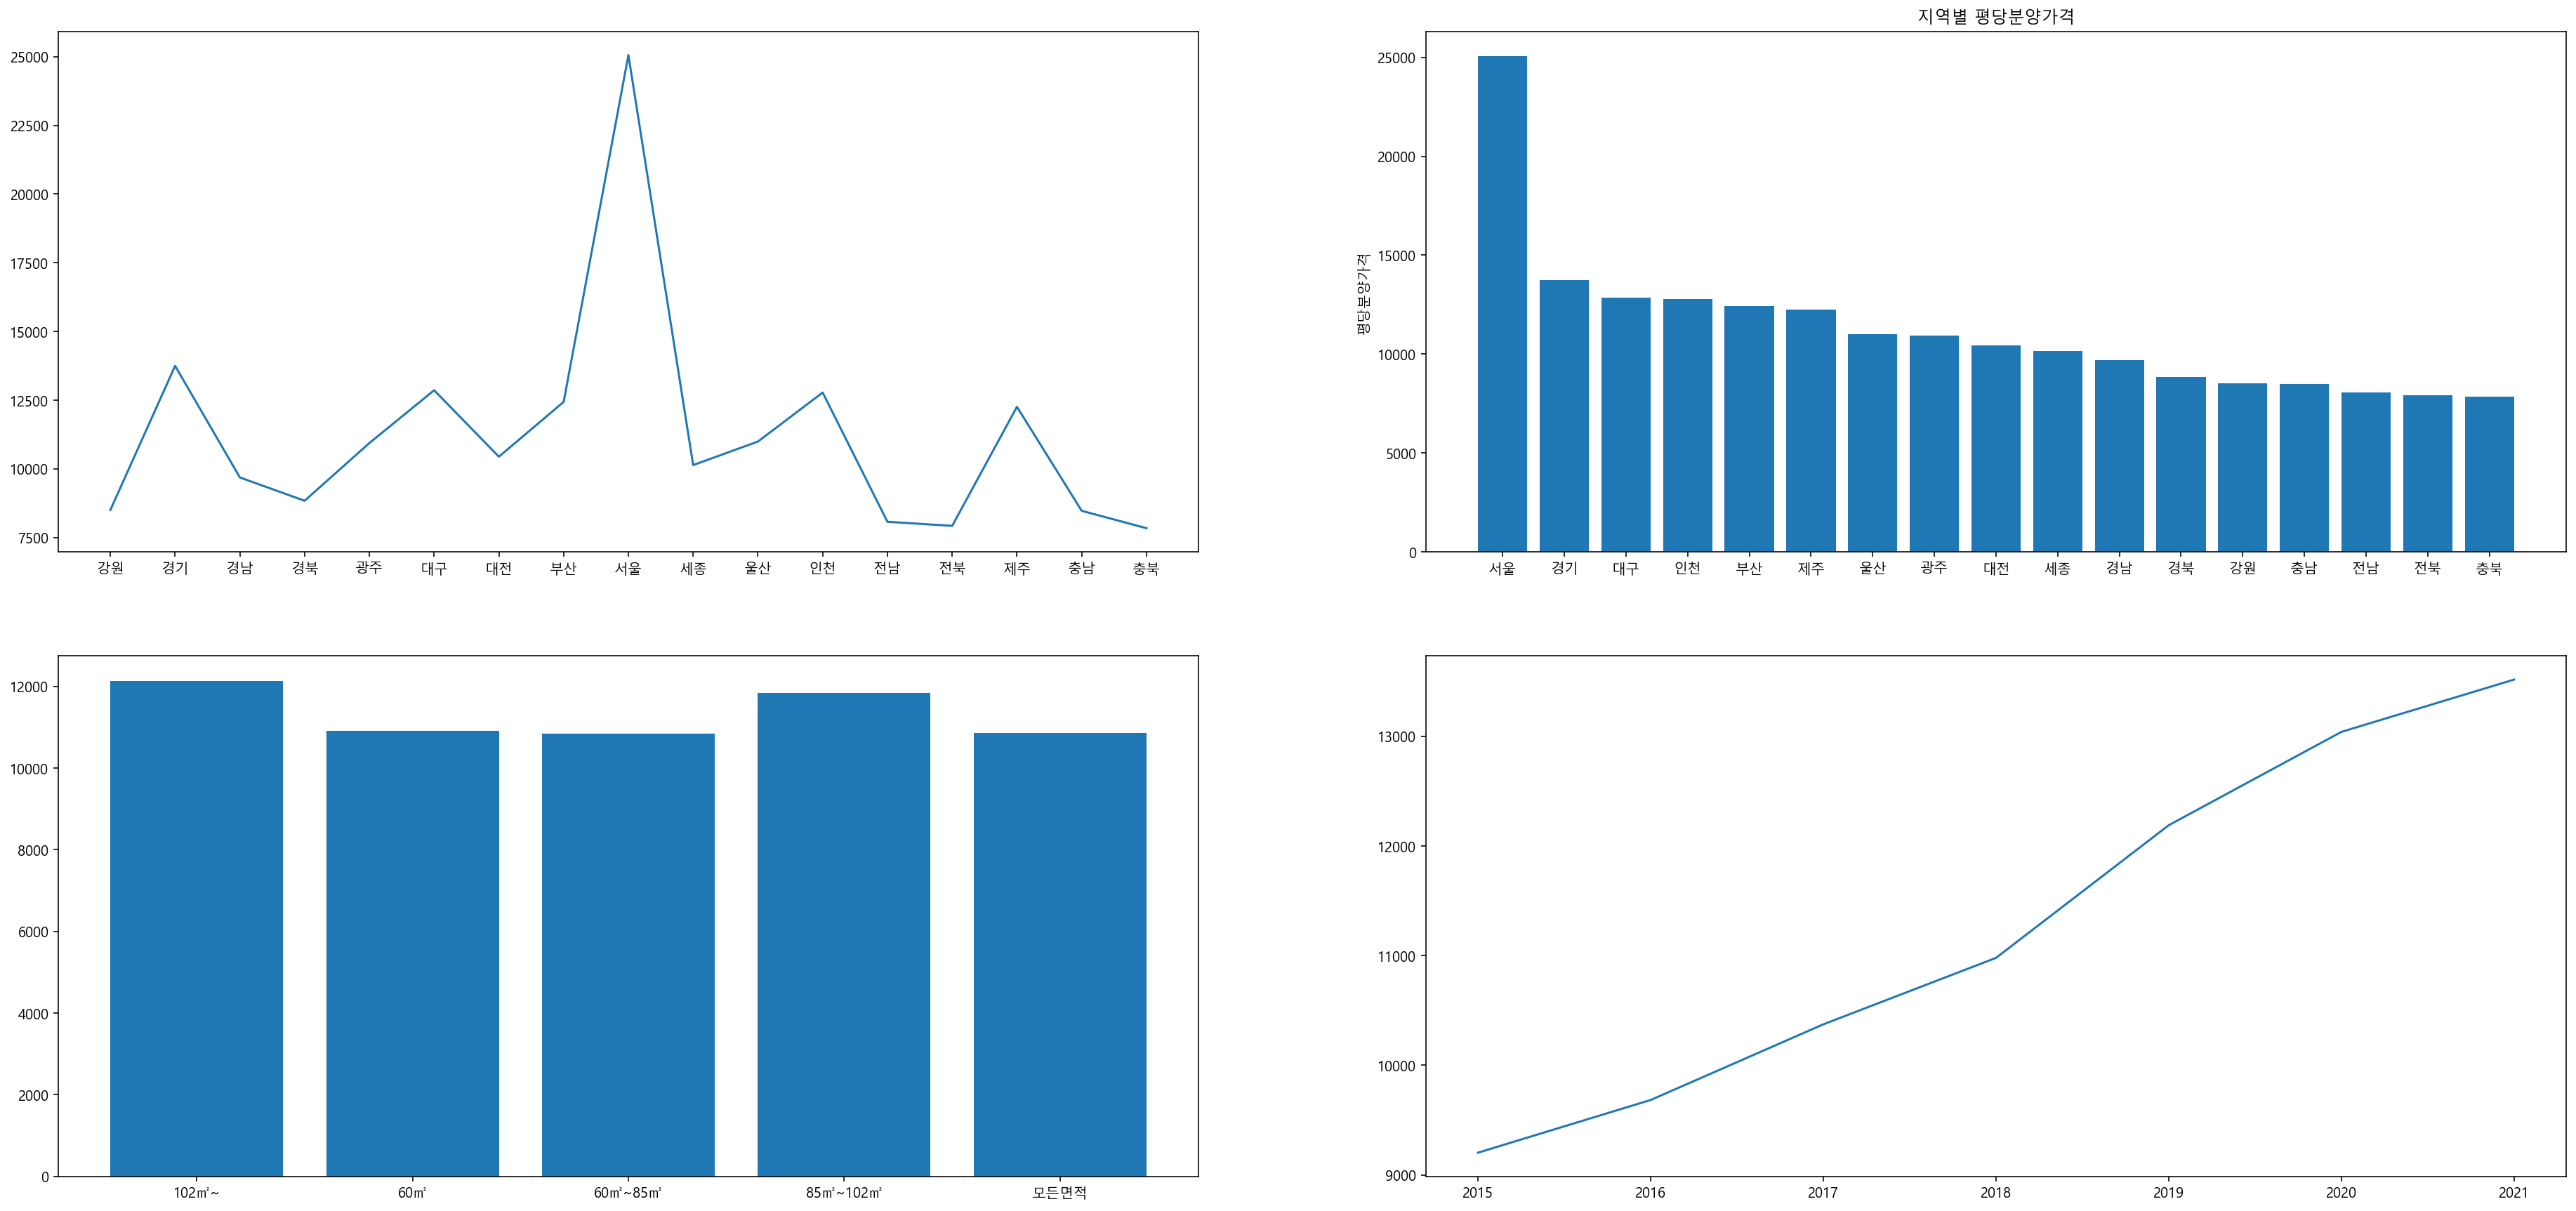

In [25]:
plt.figure(figsize = (32, 15))
plt.subplots_adjust()

plt.subplot(2, 2, 1) 
plt.plot(loc_price['지역명'], loc_price['평당분양가격'])

plt.subplot(2, 2, 2)
plt.title('지역별 평당분양가격')
plt.ylabel('평당분양가격')
plt.bar(loc_price_sort['지역명'], loc_price_sort['평당분양가격'])

plt.subplot(2, 2, 3) 
plt.bar(area_price['전용면적'], area_price['평당분양가격'])

plt.subplot(2, 2, 4)
plt.plot(year_price['연도'], year_price['평당분양가격'])b
# df_last.groupby('연도')['평당분양가격'].mean().plot()

plt.show()

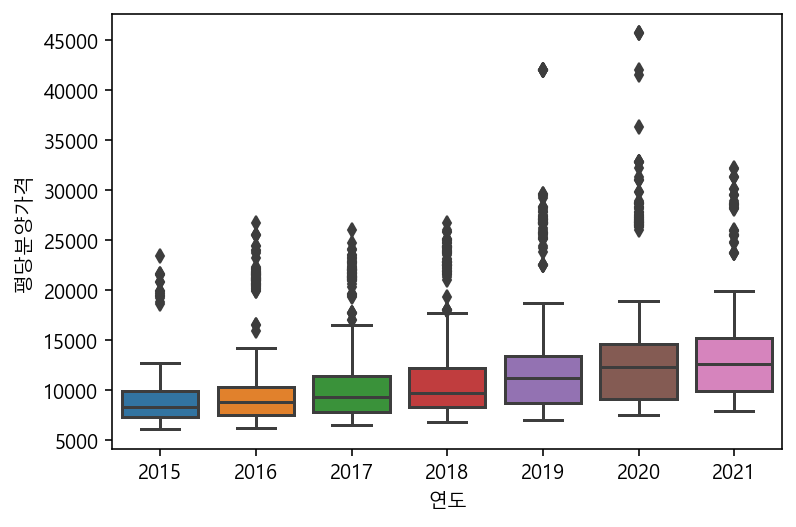

In [26]:
sns.boxplot(data=df_last, x = '연도', y = '평당분양가격')
plt.show()

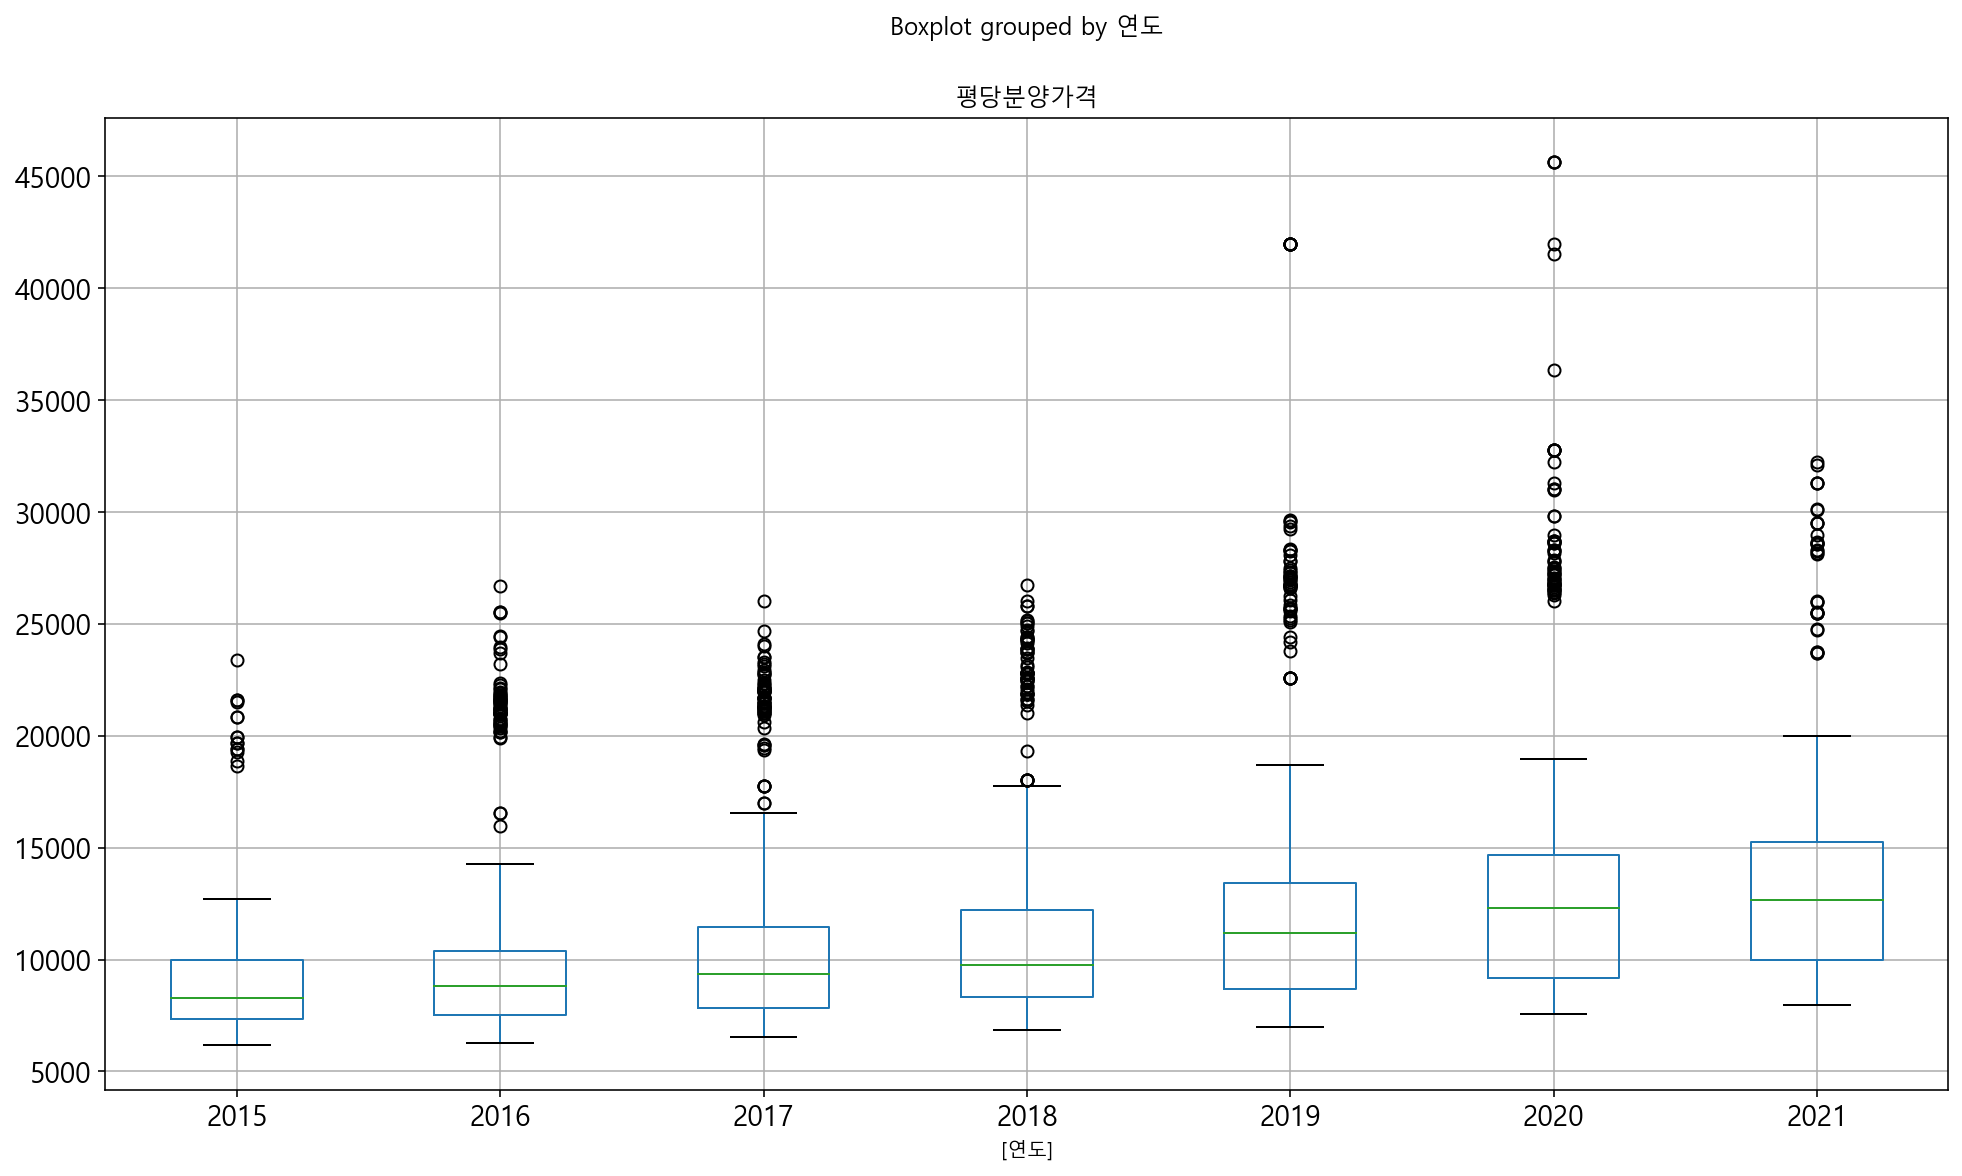

In [27]:
df_last.boxplot(column=["평당분양가격"], by=["연도"], fontsize=14, 
                figsize=(16, 9))
plt.show()

# 9번. seaborn으로 시각화(위에서 그린 시각화내용을 일부 또는 그 이상을 seaborn으로 시각화

## 9.1 지역별 평당분양가격(평균)

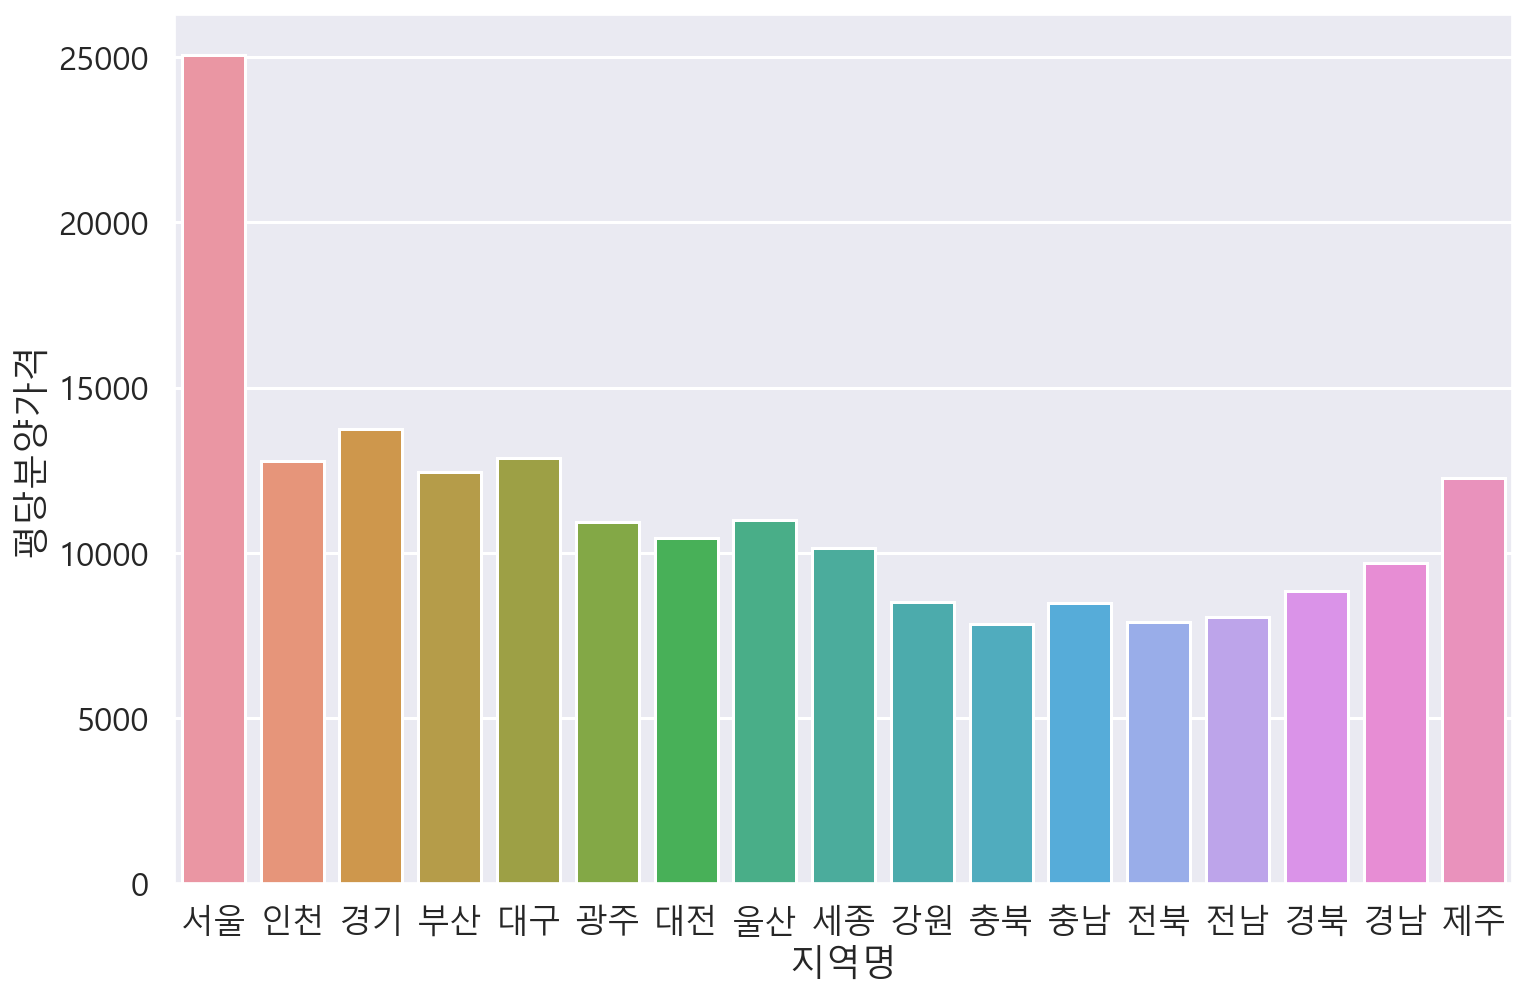

In [39]:
sns.set(context = 'talk')
plt.rc('font', family = 'Malgun Gothic')

plt.figure(figsize=(12, 8))
sns.barplot(x='지역명', y='평당분양가격', data=df_last, ci=None)

plt.show()

## 9.2 연도별 평당분양가격(평균)

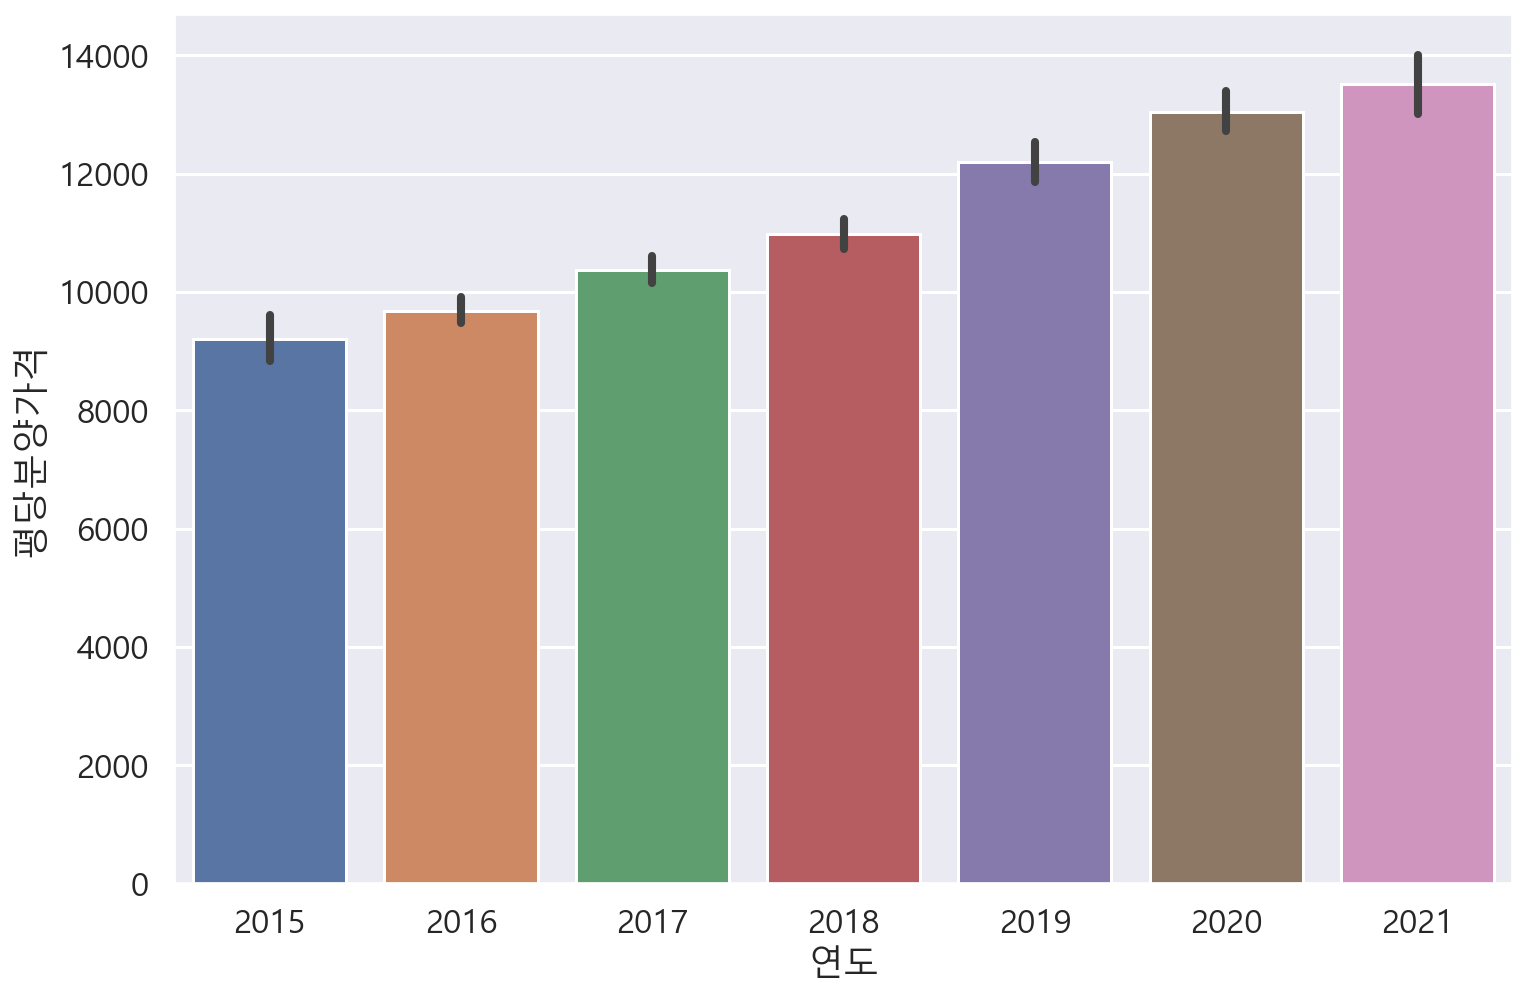

In [29]:
sns.set(context = 'talk')
plt.rc('font', family = 'Malgun Gothic')

plt.figure(figsize=(12, 8))
sns.barplot(x='연도', y='평당분양가격', data=df_last)

plt.show()

## 9.3 그 외도 추가

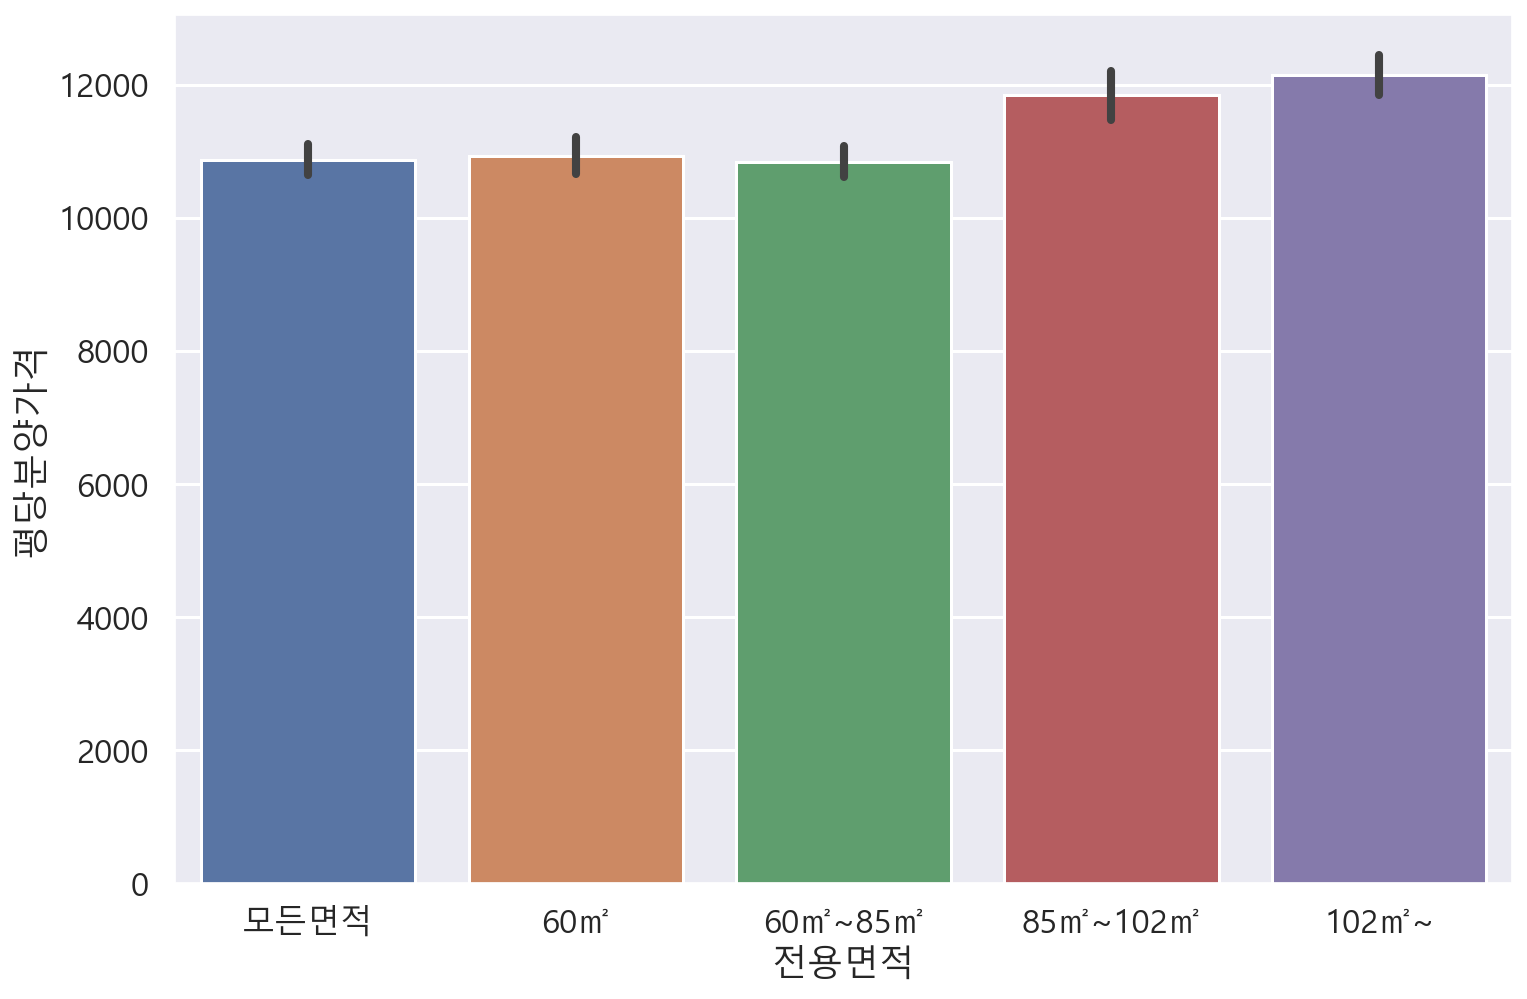

In [30]:
sns.set(context = 'talk')
plt.rc('font', family = 'Malgun Gothic')

plt.figure(figsize=(12, 8))
sns.barplot(x='전용면적', y='평당분양가격', data=df_last)

plt.show()

## 10번. 구조가 다른 df_first와 df_last의 전용면적 전체의 데이터를 하나의 같은 데이터 셋으로 합쳐서 분석을 한다. 분석은 위의 내용을 참조하여 각자 분석한다(전용면적별 분석 불가)
- 년도(int)별 평당분양가격
- 년도별 지역별 평당분양가격


In [31]:
df_first.head(10).T

,0,1,2,3,4,5,6,7,8,9
지역,서울,부산,대구,인천,광주,대전,울산,경기,세종,강원
2013년12월,18189,8111,8080,10204,6098,8321,8090,10855,7601,6230
2014년1월,17925,8111,8080,10204,7326,8321,8090,10855,7600,6230
2014년2월,17925,9078,8077,10408,7611,8321,8090,10791,7532,6230
2014년3월,18016,8965,8101,10408,7346,8341,8153,10784,7814,6141
2014년4월,18098,9402,8267,10000,7346,8341,8153,10876,7908,6373
2014년5월,19446,9501,8274,9844,7523,8341,8153,10646,7934,6350
2014년6월,18867,9453,8360,10058,7659,8333,8153,10266,8067,6350
2014년7월,18742,9457,8360,9974,7612,8333,8153,10124,8067,6268
2014년8월,19274,9411,8370,9973,7622,8333,8493,10134,8141,6268


In [32]:
df_last.head(10)

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
5,인천,2015,10,10437.9,모든면적
6,인천,2015,10,11510.4,60㎡
7,인천,2015,10,10292.7,60㎡~85㎡
8,인천,2015,10,11698.5,85㎡~102㎡
9,인천,2015,10,11246.4,102㎡~


In [33]:
df_first_melt = df_first.melt(id_vars = '지역', 
                              var_name = '연도월',
                              value_name = '평당분양가격')
df_first_melt.head()

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [34]:
df_last['연도월'] = df_last['연도'].astype('str') + '년' + df_last['월'].astype('str') + '월'

df_last.head()

,지역명,연도,월,평당분양가격,전용면적,연도월
0,서울,2015,10,19275.3,모든면적,2015년10월
1,서울,2015,10,18651.6,60㎡,2015년10월
2,서울,2015,10,19410.6,60㎡~85㎡,2015년10월
3,서울,2015,10,18879.3,85㎡~102㎡,2015년10월
4,서울,2015,10,19400.7,102㎡~,2015년10월


In [40]:
new_df_last = df_last[df_last['전용면적']=='모든면적'].copy()
new_df_last = df_last.drop(['연도', '월', '전용면적'], axis = 1)

new_df_last.head()

,지역명,평당분양가격,연도월
0,서울,19275.3,2015년10월
1,서울,18651.6,2015년10월
2,서울,19410.6,2015년10월
3,서울,18879.3,2015년10월
4,서울,19400.7,2015년10월


In [41]:
new_df_last.groupby(['연도월', '지역명']).mean()

평당분양가격
연도월      지역명          
2015년10월 강원    7192.02
         경기   11008.14
         경남    8407.74
         경북    7277.82
         광주    7823.20
...                ...
2021년5월  전남    9810.24
         전북    8584.62
         제주   25007.40
         충남    9703.32
         충북    8765.46

[1156 rows x 1 columns]

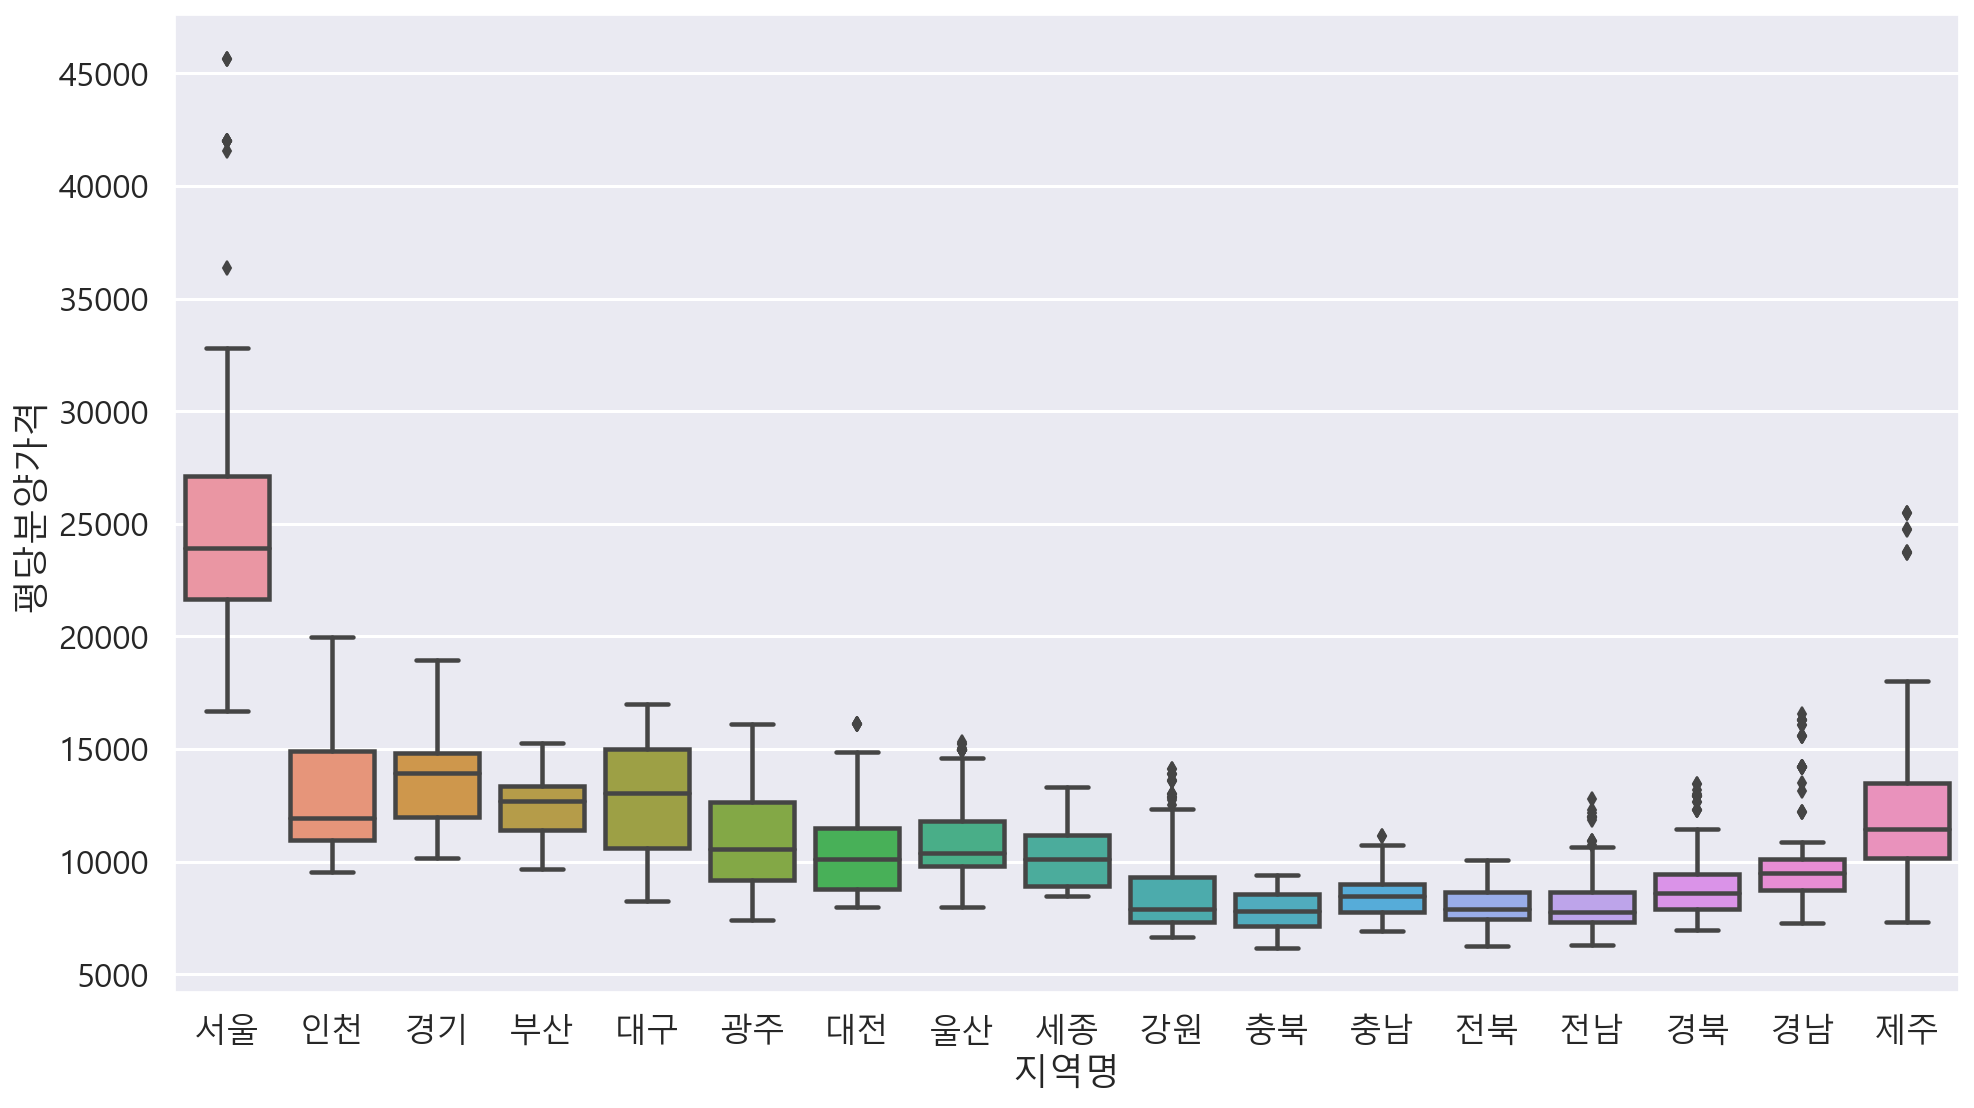

In [37]:
plt.figure(figsize=(16, 9))
sns.boxplot(data=new_df_last, x= '지역명', y = '평당분양가격')
plt.show()